## Part 1 ‐ Exploratory data analysis

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
%matplotlib inline
plt.rcParams['patch.force_edgecolor'] = True
import seaborn as sns
sns.set()

In [9]:
df = pd.read_json("logins.json")
df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [10]:
df.tail()

,login_time
93137,1970-04-13 18:50:19
93138,1970-04-13 18:43:56
93139,1970-04-13 18:54:02
93140,1970-04-13 18:57:38
93141,1970-04-13 18:54:23


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [12]:
df.describe()

,login_time
count,93142
mean,1970-02-26 19:09:39.779648278
min,1970-01-01 20:12:16
25%,1970-02-04 10:37:19.750000
50%,1970-03-01 06:33:05.500000
75%,1970-03-22 04:01:10.750000
max,1970-04-13 18:57:38


## Group the login counts into 15-minute time intervals.

In [13]:
df.set_index('login_time', inplace=True)
df['count'] = 1
df.sort_index(inplace=True)
df_agg = df.resample("15min").sum()
df_agg.head()

,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


In [14]:
df_agg.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9788 entries, 1970-01-01 20:00:00 to 1970-04-13 18:45:00
Freq: 15T
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   count   9788 non-null   int64
dtypes: int64(1)
memory usage: 152.9 KB


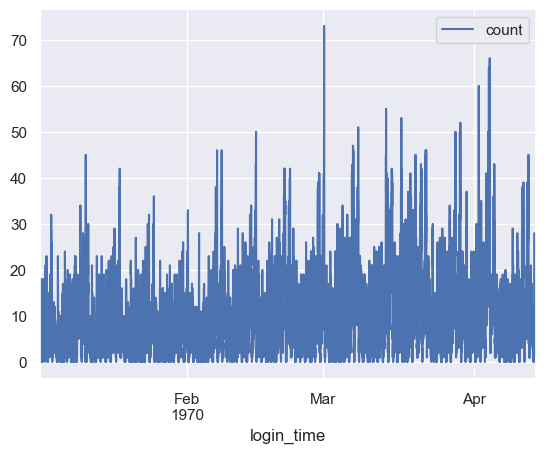

In [15]:
df_agg.plot()
plt.show()

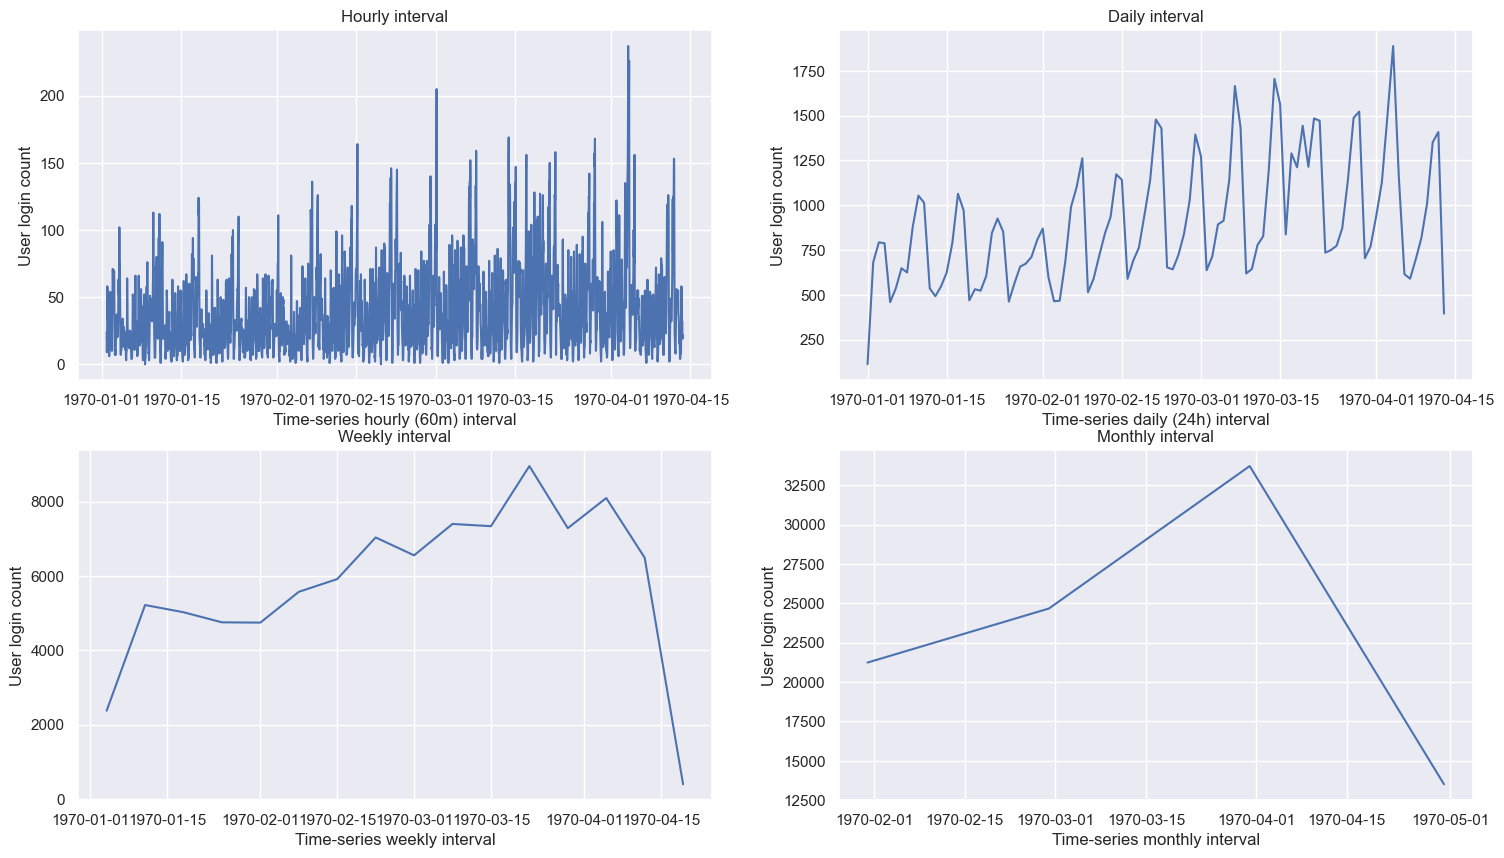

In [16]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(18,10));

# 60-min interval
ax1.plot(df.resample('60T').sum());
ax1.set(xlabel='Time-series hourly (60m) interval', ylabel='User login count', title='Hourly interval');

# Daily interval
ax2.plot(df.resample('D').sum());
ax2.set(xlabel='Time-series daily (24h) interval', ylabel='User login count', title='Daily interval');

# Weekly interval
ax3.plot(df.resample('W').sum());
ax3.set(xlabel='Time-series weekly interval', ylabel='User login count', title='Weekly interval');

# Monthly interval
ax4.plot(df.resample('M').sum());
ax4.set(xlabel='Time-series monthly interval', ylabel='User login count', title='Monthly interval');

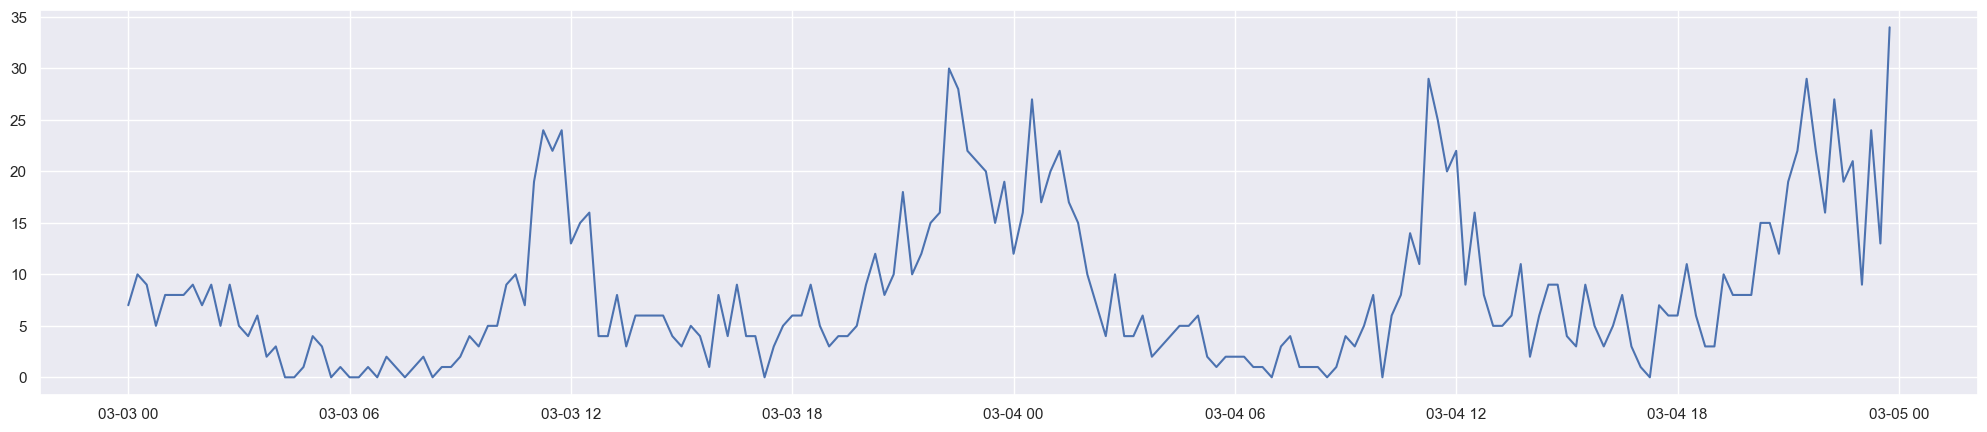

In [17]:
plt.figure(figsize=(25,5));
#df_agg.loc['1970-03-03':'1970-03-04' ].plot()
plt.plot(df_agg.loc['1970-03-03':'1970-03-04' ])

##  Part 2 ‐ Experiment and metrics design

### Q 1. What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?

Given the provided information, Ultimate Gotham experiences peak activity during nighttime, while Ultimate Metropolis sees higher demand during daytime hours on weekdays. On weekends, activity in both cities is relatively balanced. This suggests that drivers primarily serve Gotham at night and Metropolis during the day on weekdays, limiting their presence in both cities unless they work for extended hours. However, on weekends, the reasonable activity levels in both cities incentivize drivers to operate in both locations.

The key measure of success for this experiment would be the change in driver activity during weekdays. Specifically:

Daytime: Measure the increase in vehicles entering the bridge from Gotham to Metropolis.
Nighttime: Measure the increase in vehicles entering the bridge from Metropolis to Gotham.
By tracking the number of cars crossing the toll bridge during these timeframes, we can assess whether toll reimbursements are encouraging drivers to serve both cities more flexibly. Faster processing of toll reimbursements would also help ensure the effectiveness of the experiment.


### Q 2. Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on: a) how you will implement the experiment b) what statistical test(s) you will conduct to verify the significance of the observation c) how you would interpret the results and provide recommendations to the city operations team along with any caveats.

a) How you will implement the experiment
To evaluate the effectiveness of toll reimbursements, we would conduct a pre-post analysis:

Baseline Measurement: Record the number of vehicles crossing the toll bridge during daytime (Gotham to Metropolis) and nighttime (Metropolis to Gotham) on weekdays for a period of 2–4 weeks before implementing the toll reimbursement policy.
Experiment Implementation: Introduce the toll reimbursement policy, ensuring clear communication to all driver partners.
Post-Intervention Measurement: Track the number of vehicle crossings under the same conditions for another 2–4 weeks after the reimbursement policy is introduced.

b) What statistical test(s) you will conduct to verify the significance of the observation
We would use a Z-test for proportions or two-sample Z-test to compare the frequency of toll bridge crossings before and after the policy implementation.

Null Hypothesis: There is no significant difference in the number of driver crossings before and after the toll reimbursement policy.
Alternative Hypothesis: There is a significant increase in driver crossings after the toll reimbursement policy.

Steps:
Calculate the mean and standard deviation of bridge crossings before and after the intervention.
Use a significance level of 0.05 to determine the threshold for statistical significance.
Compute the Z-score and its corresponding p-value. If p-value < 0.05, reject the null hypothesis.

c) How you would interpret the results and provide recommendations to the city operations team along with any caveats

Interpretation:
If the p-value is below 0.05, it indicates a statistically significant increase in driver bridge crossings after the toll reimbursement policy. This would suggest that the policy is effective in encouraging drivers to serve both cities.

Recommendations:

If the increase is significant, consider maintaining the toll reimbursement policy as it successfully reduces driver exclusivity to one city.
Monitor long-term trends to ensure sustained effectiveness and evaluate any unintended consequences, such as driver fatigue or over-utilization of the bridge.
Caveats:

Statistical significance is influenced by sample size, and small sample fluctuations can affect the outcome.
Real-world factors like traffic, economic conditions, or weather might also impact bridge activity.
Set a practical threshold for improvement (e.g., a 10–20% increase in crossings) to ensure the policy's benefits outweigh its costs.
In conclusion, the policy should only be deemed successful if the increase in driver crossings is both statistically significant and practically meaningful.

##  Part 3 ‐ Predictive modeling

In [19]:
dff = pd.read_json("ultimate_data_challenge.json")

In [20]:
dff.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [21]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [22]:
#drop rows with no phone information, since we cannot infer that without building a predictive model
dff = dff.drop(dff[dff.phone.isna()==True].index,axis=0)
dff.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49604 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    49604 non-null  object 
 1   trips_in_first_30_days  49604 non-null  int64  
 2   signup_date             49604 non-null  object 
 3   avg_rating_of_driver    41578 non-null  float64
 4   avg_surge               49604 non-null  float64
 5   last_trip_date          49604 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               49604 non-null  float64
 8   ultimate_black_user     49604 non-null  bool   
 9   weekday_pct             49604 non-null  float64
 10  avg_dist                49604 non-null  float64
 11  avg_rating_by_driver    49406 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.6+ MB


In [23]:
#fill missing values by mean values of the column avg_rating_of_driver and avg_rating_by_driver
dff.avg_rating_by_driver.fillna(dff.avg_rating_by_driver.mean(),inplace=True)
dff.avg_rating_of_driver.fillna(dff.avg_rating_of_driver.mean(),inplace=True)

In [24]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49604 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    49604 non-null  object 
 1   trips_in_first_30_days  49604 non-null  int64  
 2   signup_date             49604 non-null  object 
 3   avg_rating_of_driver    49604 non-null  float64
 4   avg_surge               49604 non-null  float64
 5   last_trip_date          49604 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               49604 non-null  float64
 8   ultimate_black_user     49604 non-null  bool   
 9   weekday_pct             49604 non-null  float64
 10  avg_dist                49604 non-null  float64
 11  avg_rating_by_driver    49604 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.6+ MB


In [32]:
#converting 'last_trip_date' column from object type to timestamp
dff['last_trip_date'] = pd.to_datetime(dff['last_trip_date'])
#set current date 
current_date = dff['last_trip_date'].max()

#find if user qualifies as active
dff['active'] = dff['last_trip_date'].apply(lambda date: 0 if (current_date-date).days>30 else 1)
dff.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,0


In [33]:
dff['active'].value_counts()

active
0    30933
1    18671
Name: count, dtype: int64

In [34]:
#create dummy variables for categorical features
df_features = pd.get_dummies(dff,columns=['city','phone','ultimate_black_user'])
df_features.head()

,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,active,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone,ultimate_black_user_False,ultimate_black_user_True
0,4,2014-01-25,4.7,1.10,2014-06-17,15.4,46.2,3.67,5.0,1,False,True,False,False,True,False,True
1,0,2014-01-29,5.0,1.00,2014-05-05,0.0,50.0,8.26,5.0,0,True,False,False,True,False,True,False
2,3,2014-01-06,4.3,1.00,2014-01-07,0.0,100.0,0.77,5.0,0,True,False,False,False,True,True,False
3,9,2014-01-10,4.6,1.14,2014-06-29,20.0,80.0,2.36,4.9,1,False,True,False,False,True,False,True
4,14,2014-01-27,4.4,1.19,2014-03-15,11.8,82.4,3.13,4.9,0,False,False,True,True,False,True,False


In [35]:
#set target and drop unuseful columns
target = df_features['active']
df_features = df_features.drop(['last_trip_date','signup_date','active'],axis=1)
df_features.head()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone,ultimate_black_user_False,ultimate_black_user_True
0,4,4.7,1.10,15.4,46.2,3.67,5.0,False,True,False,False,True,False,True
1,0,5.0,1.00,0.0,50.0,8.26,5.0,True,False,False,True,False,True,False
2,3,4.3,1.00,0.0,100.0,0.77,5.0,True,False,False,False,True,True,False
3,9,4.6,1.14,20.0,80.0,2.36,4.9,False,True,False,False,True,False,True
4,14,4.4,1.19,11.8,82.4,3.13,4.9,False,False,True,True,False,True,False


## MODEL: RANDOM FOREST

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, QuantileTransformer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix
from sklearn.linear_model import LogisticRegression

In [38]:
#scale data
scaler = QuantileTransformer()
scaled_features = scaler.fit_transform(df_features)

#split data for training and testing
X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, test_size=0.2,random_state=42)

#build random forest model with 1000 estimators
rf = RandomForestClassifier(n_estimators=1000)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

rf.score(X_test,y_test)

0.7513355508517287

In [39]:
cv_score=cross_val_score(rf,X_test,np.ravel(y_test),cv=5)
print('Mean Cross Validated Score:',np.mean(cv_score))

Mean Cross Validated Score: 0.7496215060534654


In [40]:
df_importance = pd.DataFrame(zip(list(df_features.columns),rf.feature_importances_),index=range(df_features.columns.shape[0]),columns=['feature','importance'])
df_importance.sort_values(by='importance',ascending=False)

,feature,importance
5,avg_dist,0.299705
4,weekday_pct,0.132349
6,avg_rating_by_driver,0.113184
1,avg_rating_of_driver,0.081963
3,surge_pct,0.080405
0,trips_in_first_30_days,0.079769
2,avg_surge,0.066672
8,city_King's Landing,0.046618
11,phone_iPhone,0.020099
10,phone_Android,0.018933


In [41]:
#generate confusion matrix
confusion_matrix(y_test,y_pred)

array([[4972, 1228],
       [1239, 2482]], dtype=int64)

## LOGISTIC REGRESSION

In [42]:
#initialize model
logit = LogisticRegression(solver='lbfgs')
#set parameter grid
param_grid = {'C':np.arange(0.5,5.1,0.1)}
#instantiate and fit grid search object
grid = GridSearchCV(logit,param_grid,cv=5)
grid.fit(X_train,np.ravel(y_train))

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7,
       1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. ,
       3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3,
       4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. ])})

In [43]:
grid.best_estimator_.C

4.899999999999999

In [44]:
#find coefficients from Logistic Regression
logit_coef = LogisticRegression(C=grid.best_estimator_.C)
logit_coef.fit(X_train,y_train)
df_coef = pd.DataFrame(zip(list(df_features.columns),logit_coef.coef_[0]),index=range(df_features.columns.shape[0]),columns=['feature','coefficient'])
df_coef

,feature,coefficient
0,trips_in_first_30_days,0.127596
1,avg_rating_of_driver,-0.328442
2,avg_surge,2.319525
3,surge_pct,-1.235157
4,weekday_pct,-0.233832
5,avg_dist,0.159404
6,avg_rating_by_driver,-1.344610
7,city_Astapor,-0.771128
8,city_King's Landing,1.112564
9,city_Winterfell,-0.250394


In [45]:
print(np.mean(cross_val_score(grid,X_test,np.ravel(y_test),cv=5)))

0.7414576054278053


We did not observe any significant advantage in using Logistic Regression for our classifier, as both models performed nearly identically.

In summary, we have extracted highly valuable insights from this dataset.

Model Performance: We built a predictive model with 74% accuracy, which can be leveraged for future predictions.

Key Insights: The findings derived from the model are arguably even more impactful for the company. Random Forest identified the most important features, while Logistic Regression provided clarity on the direction of their effects through coefficients. Analyzing the three most critical features, we observed the following relationships with user "activity" at the 6-month mark:

Average Distance: This feature presents a nuanced result. Logistic Regression suggests that a higher average trip distance in the first 30 days increases the likelihood of being an active user. However, the data shows that inactive riders, on average, have a slightly larger mean trip distance. Given this ambiguity, it may not be beneficial to focus on increasing the average trip distance.

Weekday Percentage: The likelihood of a user remaining active decreases as the percentage of trips taken on weekdays increases. This indicates that encouraging riders to use the app on weekends could positively impact long-term retention and revenue.

Average Rating by Driver: Surprisingly, higher average ratings given by drivers are associated with a lower likelihood of user activity after 6 months.

Trips in the First 30 Days: This feature has a clear positive relationship with user activity. The more trips a rider takes within the first 30 days, the greater their chances of being active after 6 months.

Recommendations:
Based on these insights, the following strategies are recommended to increase long-term rider activity and revenue:

Weekend Incentives: Offer promotions or rewards to encourage app usage on weekends.
First 30 Days Activity: Implement incentives to encourage riders to take more trips within their first month of using the app.
Driver Ratings: Educate drivers to avoid artificially inflating ratings, as this may not contribute positively to long-term rider retention.
By following these recommendations, the company can effectively improve user activity rates, leading to sustained growth and increased revenue over time.